In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [8]:
mnist.train.images.shape

(55000, 784)

In [18]:
sample = mnist.train.images[13].reshape(28,28)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

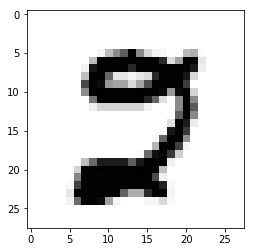

In [20]:
plt.imshow(sample,cmap='Greys')

In [21]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [22]:
n_classes = 10
n_samples = mnist.train.num_examples

In [23]:
n_input = 784

In [24]:
n_hidden_1 = 256
n_hidden_2 = 256

In [34]:
def multilayer_perceptron(X,W,b):
    """
    X: Placeholder for data input
    W: Dictionary of weights applied to data
    b: Dictionary of bias terms
    """
    
    #First hidden layer activated with ReLU function
    # X * W + b
    layer_1 = tf.add(tf.matmul(X,W['h1']),b['b1'])
    # ReLU(X * W + b) --> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,W['h2']),b['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Output layer
    out_layer = tf.matmul(layer_2,W['out']) + b['out']
    
    return out_layer

In [35]:
W = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [36]:
b = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [37]:
X = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_classes])

In [38]:
pred = multilayer_perceptron(X,W,b)

In [41]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=pred,logits=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)